<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Iowa Liquor Sales 

---

In this project, you will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in the first half of Project 2. 

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
# check the iowa file location for your computer 
iowa_file = '~/Desktop/DSI-SF-5/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)
print "Dataframe is of size: " + str(iowa.values.nbytes / 10**6) + "MB"

Dataframe is of size: 39MB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [4]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [5]:
#convert ints to floats
    #iowa['Volume Sold (ml)']
    #iowa['Bottle Volume (ml)']
#convert dollar values from string to floats 
    #iowa['State Bottle Cost']
    #iowa['State Bottle Retail']
    #iowa['Sale (Dollars)']
#convert Date to to_datetime
    #iowa['Date']
#convert to all caps
    #iowa['City']
    #iowa['County']

### 3.2 Clean the columns

In [6]:
iowa['Date'] = pd.to_datetime(iowa['Date'])
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].replace( '[\$,)]','', regex=True).astype(float)
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].replace( '[\$,)]','', regex=True).astype(float)
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].replace( '[\$,)]','', regex=True).astype(float)
iowa['Volume Sold (ml)'] = iowa['Volume Sold (Liters)'].apply(lambda x: x*1000)
iowa['Bottle Volume (ml)'] = iowa['Bottle Volume (ml)'].astype(float)
iowa['City'] = iowa['City'].str.upper()
iowa['County'] = iowa['County'].str.upper()

In [7]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Volume Sold (ml)
0,2015-11-04,3717,SUMNER,50674,9.0,BREMER,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750.0,4.50,6.75,12,81.00,9.0,2.38,9000.0
1,2016-03-02,2614,DAVENPORT,52807,82.0,SCOTT,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750.0,13.75,20.63,2,41.26,1.5,0.40,1500.0
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,BLACK HAWK,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000.0,12.59,18.89,24,453.36,24.0,6.34,24000.0
3,2016-02-03,2501,AMES,50010,85.0,STORY,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750.0,9.50,14.25,6,85.50,10.5,2.77,10500.0
4,2015-08-18,3654,BELMOND,50421,99.0,WRIGHT,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750.0,7.20,10.80,12,129.60,21.0,5.55,21000.0


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [8]:
#get columns with null
iowa.columns[iowa.isnull().any()].tolist()

['County Number', 'County', 'Category', 'Category Name']

In [9]:
#look of columns with null
iowa[iowa.isnull().any(axis=1)]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Volume Sold (ml)
135,2016-01-20,5222,CEDAR RAPIDS,52402,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,Paul Masson Grande Amber Brandy,375.0,3.22,4.83,24,115.92,9.00,2.38,9000.0
198,2016-03-02,3820,SIOUX CITY,51103,NaN,NaN,1032080.0,IMPORTED VODKA,35,34359,Grey Goose Vodka,200.0,5.00,7.50,12,90.00,2.40,0.63,2400.0
272,2016-03-21,4222,EVANSDALE,50707,NaN,NaN,1062300.0,FLAVORED RUM,370,42716,Malibu Coconut Rum,750.0,7.49,11.24,3,33.72,2.25,0.59,2250.0
290,2016-03-21,5236,ANAMOSA,52205,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64868,Fireball Cinnamon Whiskey,1750.0,15.33,23.00,6,138.00,10.50,2.77,10500.0
321,2016-02-23,4203,WAVERLY,50677,NaN,NaN,1051100.0,APRICOT BRANDIES,434,55084,Paramount Blackberry Brandy,375.0,3.55,5.33,24,127.92,9.00,2.38,9000.0
863,2016-01-11,2460,HAMPTON,50441,NaN,NaN,1011200.0,STRAIGHT BOURBON WHISKIES,461,77776,Wild Turkey American Honey,750.0,10.50,15.75,3,47.25,2.25,0.59,2250.0
896,2015-02-05,4829,DES MOINES,50314,77.0,POLK,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750.0,23.58,35.37,6,212.22,4.50,1.19,4500.0
901,2016-02-25,4647,WATERLOO,50707,7.0,BLACK HAWK,1052100.0,NaN,420,48099,Hennessy VS,200.0,5.74,8.61,24,206.64,4.80,1.27,4800.0
964,2015-05-19,4247,BELMOND,50421,NaN,NaN,1012100.0,CANADIAN WHISKIES,55,12408,Canadian Ltd Whisky,1750.0,9.14,13.71,6,82.26,10.50,2.77,10500.0
982,2016-03-30,5222,CEDAR RAPIDS,52402,NaN,NaN,1031080.0,VODKA 80 PROOF,300,36904,Mccormick Vodka Pet,375.0,1.80,2.70,24,64.80,9.00,2.38,9000.0


In [10]:
#create dict with city, county number and county
citydictcounty = dict(zip(iowa['City'], iowa['County']))
citydictcountynum = dict(zip(iowa['City'], iowa['County Number']))
categorydict = dict(zip(iowa['Item Description'], iowa['Category']))
categorynamedict = dict(zip(iowa['Item Description'], iowa['Category Name']))

def sort_county(cat):
    for x, y in citydictcounty.items():
        cat = str(cat)
        if x in cat:
            return y
        
def sort_county_num(cat):
    for x, y in citydictcountynum.items():
        cat = str(cat)
        if x in cat:
            return y

def sort_category(cat):
    for x, y in categorydict.items():
        cat = str(cat)
        if x in cat:
            return y
        
def sort_category_name(cat):
    for x, y in categorynamedict.items():
        cat = str(cat)
        if x in cat:
            return y

#Find out how to make this work in one function

In [11]:
iowa['County'] = iowa['City'].apply(sort_county)

In [12]:
iowa['County Number'] = iowa['City'].apply(sort_county_num)

In [13]:
iowa['Category'] = iowa['Item Description'].apply(sort_category)

In [14]:
iowa['Category Name'] = iowa['Item Description'].apply(sort_category_name)

In [15]:
#updated look of columns with null
iowa[iowa.isnull().any(axis=1)]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Volume Sold (ml)
896,2015-02-05,4829,DES MOINES,50314,77.0,POLK,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750.0,23.58,35.37,6,212.22,4.50,1.19,4500.0
3330,2015-08-12,3909,MELCHER-DALLAS,50163,63.0,MARION,1011700.0,NaN,381,27370,American Born Moonshine Apple Pie,750.0,12.50,18.75,4,75.00,3.00,0.79,3000.0
5928,2015-12-10,4829,DES MOINES,50314,77.0,POLK,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750.0,23.58,35.37,6,212.22,4.50,1.19,4500.0
6744,2015-11-16,4857,WEST BURLINGTON,52655,29.0,DES MOINES,NaN,NaN,85,333,Jack Daniels TN Honey & Jack Daniels TN Fire 7...,1500.0,15.07,22.61,1,22.61,1.50,0.40,1500.0
11241,2015-10-27,3625,ANKENY,50021,77.0,POLK,NaN,NaN,259,59100,Evan Williams Egg Nog,750.0,4.46,6.69,10,66.90,7.50,1.98,7500.0
15970,2015-02-11,2623,SIOUX CITY,51104,97.0,WOODBURY,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750.0,23.58,35.37,1,35.37,0.75,0.20,750.0
16069,2015-01-12,2478,ALTOONA,50009,77.0,POLK,1091100.0,NaN,434,35692,Pearl Caramel Vodka,750.0,7.86,11.79,12,141.48,9.00,2.38,9000.0
17213,2016-02-11,2652,MASON CITY,50401,17.0,CERRO GORDO,1022200.0,NaN,434,87646,Exotico Blanco,750.0,10.00,15.00,4,60.00,3.00,0.79,3000.0
18404,2015-11-12,4829,DES MOINES,50314,77.0,POLK,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750.0,23.58,35.37,6,212.22,4.50,1.19,4500.0
18996,2015-11-19,3664,NORTHWOOD,50459,98.0,WORTH,NaN,NaN,85,333,Jack Daniels TN Honey & Jack Daniels TN Fire 7...,1500.0,15.07,22.61,4,90.44,6.00,1.59,6000.0


In [16]:
#Remaining NaN will need to be research

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [17]:
#Options are to remove problematic stores 
#or keep problematic stores and estimate what to would be if constance for the whole year

#I decided to remove problematic stores to simplify process

In [18]:
#to check if store is open all year, compare if a store made a sale in Jan and Dec
#create daterange for 2015, January and December
dates = pd.date_range('2015-01', '2015-12-31')
jan2015 =  pd.date_range('2015-01', '2015-01-31')
dec2015 =  pd.date_range('2015-12', '2015-12-31')

#create dataframes based on dates
mask2015 = iowa['Date'].isin(dates)
iowa2015 = iowa[mask2015]
iowajan2015 = iowa[iowa['Date'].isin(jan2015)]
iowadec2015 = iowa[iowa['Date'].isin(dec2015)]

In [19]:
#create mask to compare store numbers in jan and dec
iowajandec = iowajan2015['Store Number'].isin(iowadec2015['Store Number'])

#create dataframes to compare store numbers in jan and dec
in_iowajandec = iowajan2015[iowajandec]

In [20]:
#create mask for stores open in jan and dec
yearlongstores = in_iowajandec['Store Number'].tolist()

#create dataframe with stores open year long in 2015
openiowa2015 = iowa2015[iowa2015['Store Number'].isin(yearlongstores)]

In [21]:
#view dataframe
openiowa2015.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Volume Sold (ml)
0,2015-11-04,3717,SUMNER,50674,9.0,BREMER,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750.0,4.50,6.75,12,81.00,9.00,2.38,9000.0
4,2015-08-18,3654,BELMOND,50421,99.0,WRIGHT,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,297,35918,Five O'clock Vodka,1750.0,7.20,10.80,12,129.60,21.00,5.55,21000.0
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,LINN,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750.0,13.32,19.98,6,119.88,10.50,2.77,10500.0
6,2015-08-05,2596,OTTUMWA,52501,90.0,WAPELLO,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750.0,6.66,9.99,3,29.97,2.25,0.59,2250.0
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,CERRO GORDO,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750.0,15.75,23.63,2,47.26,3.50,0.92,3500.0


In [22]:
openiowa2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204104 entries, 0 to 270954
Data columns (total 19 columns):
Date                     204104 non-null datetime64[ns]
Store Number             204104 non-null int64
City                     204104 non-null object
Zip Code                 204104 non-null object
County Number            204104 non-null float64
County                   204104 non-null object
Category                 204074 non-null float64
Category Name            203998 non-null object
Vendor Number            204104 non-null int64
Item Number              204104 non-null int64
Item Description         204104 non-null object
Bottle Volume (ml)       204104 non-null float64
State Bottle Cost        204104 non-null float64
State Bottle Retail      204104 non-null float64
Bottles Sold             204104 non-null int64
Sale (Dollars)           204104 non-null float64
Volume Sold (Liters)     204104 non-null float64
Volume Sold (Gallons)    204104 non-null float64
Volume Sold (

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [23]:
#groupby store number and get sum of sale
storesales2015 = openiowa2015.groupby(openiowa2015['Store Number'])['Sale (Dollars)'].sum().reset_index()
storesales2015.head()

,Store Number,Sale (Dollars)
0,2106,146326.22
1,2113,9310.22
2,2130,111871.43
3,2152,7721.08
4,2178,24324.18


### 5.2 Calculate the profit each store is making in 2015.


In [24]:
#groupby store number
#(State Bottle Retail-State Bottle Cost)*Bottles Sold
iowa2015profit = (openiowa2015['State Bottle Retail']-openiowa2015['State Bottle Cost'])*openiowa2015['Bottles Sold']
storeprofit = iowa2015profit.groupby(openiowa2015['Store Number']).sum().reset_index()
storeprofit.columns = ['Store Number', 'Store Profits']
storeprofit.head()

,Store Number,Store Profits
0,2106,48838.08
1,2113,3109.04
2,2130,37325.20
3,2152,2587.53
4,2178,8165.70


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [25]:
#group by county
#iowa has 99 counties
unique_counties = len(openiowa2015['County'].unique())
#get avg profit of every store in each county
countiesprofitmean = storeprofit.groupby(openiowa2015['County']).mean()
countiesprofitmean.columns = ['Store Number', 'Average Store Profit']
del countiesprofitmean['Store Number']
countiesprofitmean.sort_values(['Average Store Profit'], ascending = False).head(10)
#are some counties missing? did some counties not have store open from jan 2015 to dec 2015?

,Average Store Profit
County,
GREENE,77525.080000
WEBSTER,63883.845000
DECATUR,24671.055000
EMMET,23706.946000
HARDIN,21942.846667
TAMA,19334.611667
FAYETTE,17553.440000
KOSSUTH,17401.973333
IOWA,15029.751667


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [26]:
#get Volume Sold (Gallons) by county
#divide Average Store Profit by Volume Sold (Gallons)
gallonssoldbystore = openiowa2015.groupby(openiowa2015['Store Number'])['Volume Sold (Gallons)'].sum().reset_index()
storeprofitsgallons = storeprofit.merge(gallonssoldbystore, left_on='Store Number', right_on='Store Number')
storeprofitsgallons.head()

,Store Number,Store Profits,Volume Sold (Gallons)
0,2106,48838.08,2571.33
1,2113,3109.04,174.29
2,2130,37325.20,1820.65
3,2152,2587.53,167.28
4,2178,8165.70,506.50


In [27]:
by_store_profit= storeprofitsgallons.sort_values('Store Profits', ascending = False)
by_store_profit.head()

,Store Number,Store Profits,Volume Sold (Gallons)
121,2633,333816.91,16356.02
887,4829,293196.99,13419.53
175,3385,147884.62,8338.23
33,2512,140143.46,6848.37
181,3420,117593.34,6642.25


In [28]:
by_gallons = storeprofitsgallons.sort_values('Volume Sold (Gallons)', ascending = False)
by_gallons.head()

,Store Number,Store Profits,Volume Sold (Gallons)
121,2633,333816.91,16356.02
887,4829,293196.99,13419.53
175,3385,147884.62,8338.23
33,2512,140143.46,6848.37
181,3420,117593.34,6642.25


In [29]:
profitpergallons = storeprofitsgallons['Store Profits']/storeprofitsgallons['Volume Sold (Gallons)']
profitpergallons
newstoreprofitsgallons = pd.concat([storeprofitsgallons, profitpergallons], axis=1)
newstoreprofitsgallons.columns = ['Store Number', 'Store Profits', 'Volume Sold (Gallons)', 'Profit/Gallons']
newstoreprofitsgallons.sort_values('Profit/Gallons', ascending=False).head()

,Store Number,Store Profits,Volume Sold (Gallons),Profit/Gallons
784,4669,3143.12,36.39,86.373179
1045,9001,9403.68,168.83,55.699106
899,4849,3332.80,65.81,50.642759
1046,9002,12574.08,328.17,38.315751
997,5009,1352.29,42.01,32.189717


In [30]:
#Store Profits generally increses as Volume Sold (Gallons), however it some profit to store size are irregular

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [31]:
#get unique values of all Category Name
cname = iowa['Category Name'].unique()
catname = cname.tolist()
catname[:5]

['APRICOT BRANDIES',
 'BLENDED WHISKIES',
 'STRAIGHT BOURBON WHISKIES',
 'AMERICAN COCKTAILS',
 'PUERTO RICO & VIRGIN ISLANDS RUM']

In [32]:
#reduce catname to one long string
catname2 = reduce(lambda x, y: str(x) + ' ' + str(y), catname)
catname2

'APRICOT BRANDIES BLENDED WHISKIES STRAIGHT BOURBON WHISKIES AMERICAN COCKTAILS PUERTO RICO & VIRGIN ISLANDS RUM AMERICAN DRY GINS AMERICAN GRAPE BRANDIES CANADIAN WHISKIES IMPORTED VODKA CINNAMON SCHNAPPS SINGLE BARREL BOURBON WHISKIES MISC. AMERICAN CORDIALS & LIQUEURS VODKA FLAVORED DISTILLED SPIRITS SPECIALTY TEQUILA VODKA 80 PROOF TENNESSEE WHISKIES WHISKEY LIQUEUR APPLE SCHNAPPS CHERRY BRANDIES MISC. IMPORTED CORDIALS & LIQUEURS IMPORTED DRY GINS WATERMELON SCHNAPPS BLACKBERRY BRANDIES SINGLE MALT SCOTCH SPICED RUM CREAM LIQUEURS SCOTCH WHISKIES 100 PROOF VODKA IMPORTED VODKA - MISC IRISH WHISKIES FLAVORED RUM IMPORTED GRAPE BRANDIES SPEARMINT SCHNAPPS RASPBERRY SCHNAPPS TRIPLE SEC AMERICAN AMARETTO IMPORTED SCHNAPPS STRAIGHT RYE WHISKIES PEACH SCHNAPPS PEPPERMINT SCHNAPPS MISCELLANEOUS  BRANDIES STRAWBERRY SCHNAPPS AMERICAN ALCOHOL JAMAICA RUM BARBADOS RUM COFFEE LIQUEURS ROOT BEER SCHNAPPS DECANTERS & SPECIALTY PACKAGES GRAPE SCHNAPPS OTHER PROOF VODKA BOTTLED IN BOND BOURBON n

In [33]:
#split and sort repeat words to decide on liquor type
from collections import Counter
import operator
cname2 = catname2.split(' ')
cnameD = Counter(cname2)
sorted_cname = sorted(cnameD.items(), key=operator.itemgetter(1), reverse=True)
sorted_cname[:20]

[('SCHNAPPS', 14),
 ('WHISKIES', 9),
 ('IMPORTED', 8),
 ('AMERICAN', 8),
 ('BRANDIES', 7),
 ('VODKA', 7),
 ('RUM', 5),
 ('&', 5),
 ('CREME', 5),
 ('DE', 5),
 ('PROOF', 5),
 ('LIQUEURS', 4),
 ('GINS', 4),
 ('AMARETTO', 3),
 ('GRAPE', 3),
 ('FLAVORED', 3),
 ('BOURBON', 3),
 ('-', 3),
 ('DRY', 2),
 ('RYE', 2)]

In [34]:
def sort_cat(cat):
    liquor_type_list = [('SCHNAPP','SCHNAPPS'), 
                        ('WHISKIES', 'WHISKIES'), 
                        ('RYE', 'WHISKIES'), 
                        ('WHISKY', 'WHISKIES'),
                        ('SCOTCH', 'WHISKIES'), 
                        ('BOURBON', 'WHISKIES'), 
                        ('BRANDIES', 'BRANDIES'),  
                        ('VODKA', 'VODKA'),
                        ('RUM', 'RUM'), 
                        ('GIN', 'GINS'), 
                        ('CREME', 'CREME & LIQUEURS'),  
                        ('LIQUEUR', 'CREME & LIQUEURS'),
                        ('TRIPLE SEC', 'CREME & LIQUEURS'),
                        ('AMARETTO', 'CREME & LIQUEURS'), 
                        ('ANISETTE', 'CREME & LIQUEURS'),  
                        ('TEQUILA', 'TEQUILA'), 
                        ('COCKTAIL', 'COCKTAILS')]
    liquor_type_dict = dict(liquor_type_list)

    for x, y in liquor_type_dict.items():
        cat = str(cat)
        if x in cat:
            return y
    return 'OTHER'

In [35]:
openiowa2015['Liquor Type'] = openiowa2015['Category Name'].apply(sort_cat)

/Users/lana/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
openiowa2015['Profit'] = (openiowa2015['State Bottle Retail']-openiowa2015['State Bottle Cost'])*openiowa2015['Bottles Sold']

/Users/lana/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
openiowa2015.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Volume Sold (ml),Liquor Type,Profit
0,2015-11-04,3717,SUMNER,50674,9.0,BREMER,1051100.0,APRICOT BRANDIES,55,54436,...,750.0,4.50,6.75,12,81.00,9.00,2.38,9000.0,BRANDIES,27.00
4,2015-08-18,3654,BELMOND,50421,99.0,WRIGHT,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,297,35918,...,1750.0,7.20,10.80,12,129.60,21.00,5.55,21000.0,RUM,43.20
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,LINN,1041100.0,AMERICAN DRY GINS,205,31473,...,1750.0,13.32,19.98,6,119.88,10.50,2.77,10500.0,GINS,39.96
6,2015-08-05,2596,OTTUMWA,52501,90.0,WAPELLO,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,750.0,6.66,9.99,3,29.97,2.25,0.59,2250.0,BRANDIES,9.99
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,CERRO GORDO,1012100.0,CANADIAN WHISKIES,65,10628,...,1750.0,15.75,23.63,2,47.26,3.50,0.92,3500.0,WHISKIES,15.76


### 5.7 Do relationships exist between the broader liquor type and profit?

In [38]:
liquortypeVprofit = openiowa2015.groupby(['Liquor Type'])['Profit'].sum().reset_index()
liquortypeVprofit

,Liquor Type,Profit
0,BRANDIES,358655.89
1,COCKTAILS,148538.07
2,CREME & LIQUEURS,1095910.03
3,GINS,239780.37
4,OTHER,133047.82
5,RUM,1291003.87
6,SCHNAPPS,318713.33
7,TEQUILA,492596.26
8,VODKA,2051099.96
9,WHISKIES,2839439.74


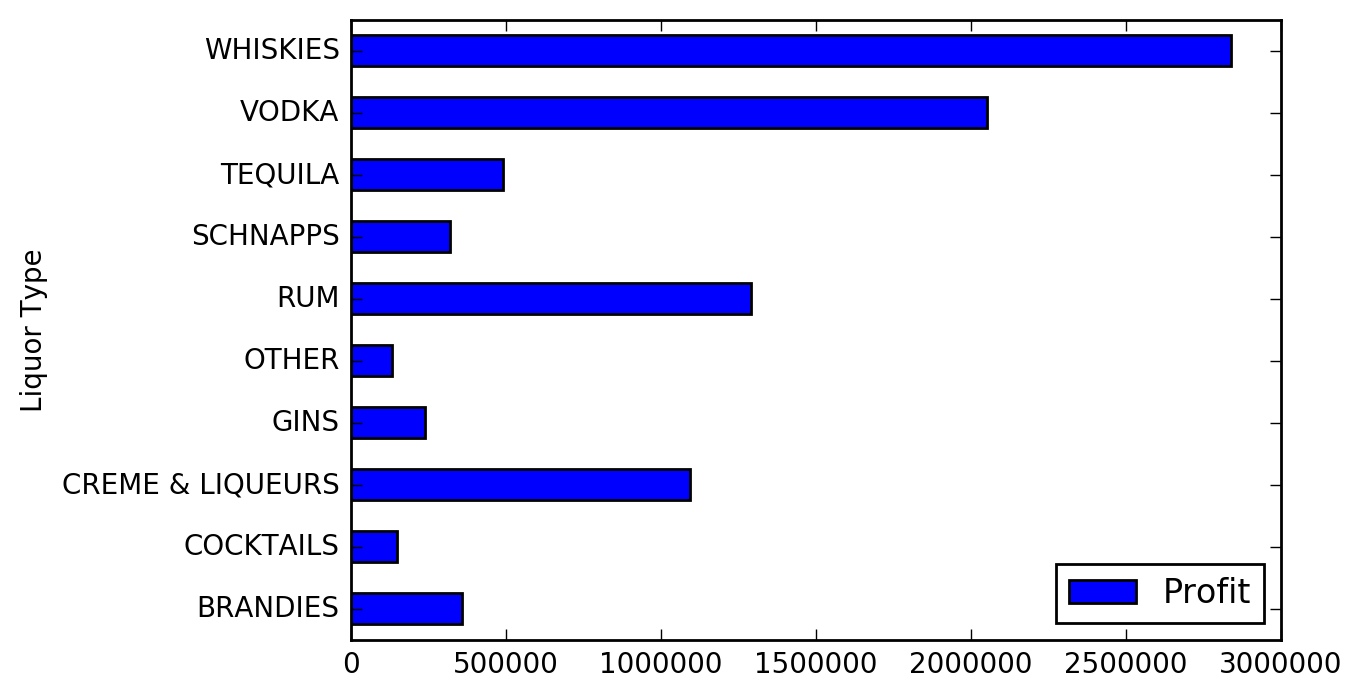

In [39]:
liquortypeVprofit.plot(kind ='barh', x='Liquor Type', y='Profit');

In [40]:
#sort by imported or domestic
def origin_cat(cat):
    liquor_loc = {'AMERICAN' : 'DOMESTIC', 
                  'IMPORTED' : 'IMPORTED',
                  'SCOTCH' : 'IMPORTED',
                  'TENNESSEE' : 'DOMESTIC', 
                  'JAPANESE' : 'IMPORTED',
                  'PUERTO RICO' : 'IMPORTED',
                  'CANADIAN' : 'IMPORTED',
                  'JAMAICA' : 'DOMESTIC',
                  'IRISH' : 'IMPORTED',
                  'BOURBON' : 'DOMESTIC',
                  'TRIPLE SEC' : 'IMPORTED',
                  'TEQUILA' : 'IMPORTED',
                  'CORN WHISKIES' : 'DOMESTIC',
                  'ANISETTE' : 'IMPORTED'
                 }
    for x, y in liquor_loc.items():
        cat = str(cat)
        if x in cat:
            return y
    return 'UNKNOWN'

openiowa2015['Origin'] = openiowa2015['Category Name'].apply(origin_cat)
openiowa2015.head()

/Users/lana/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Volume Sold (ml),Liquor Type,Profit,Origin
0,2015-11-04,3717,SUMNER,50674,9.0,BREMER,1051100.0,APRICOT BRANDIES,55,54436,...,4.50,6.75,12,81.00,9.00,2.38,9000.0,BRANDIES,27.00,UNKNOWN
4,2015-08-18,3654,BELMOND,50421,99.0,WRIGHT,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,297,35918,...,7.20,10.80,12,129.60,21.00,5.55,21000.0,RUM,43.20,IMPORTED
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,LINN,1041100.0,AMERICAN DRY GINS,205,31473,...,13.32,19.98,6,119.88,10.50,2.77,10500.0,GINS,39.96,DOMESTIC
6,2015-08-05,2596,OTTUMWA,52501,90.0,WAPELLO,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,6.66,9.99,3,29.97,2.25,0.59,2250.0,BRANDIES,9.99,DOMESTIC
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,CERRO GORDO,1012100.0,CANADIAN WHISKIES,65,10628,...,15.75,23.63,2,47.26,3.50,0.92,3500.0,WHISKIES,15.76,IMPORTED


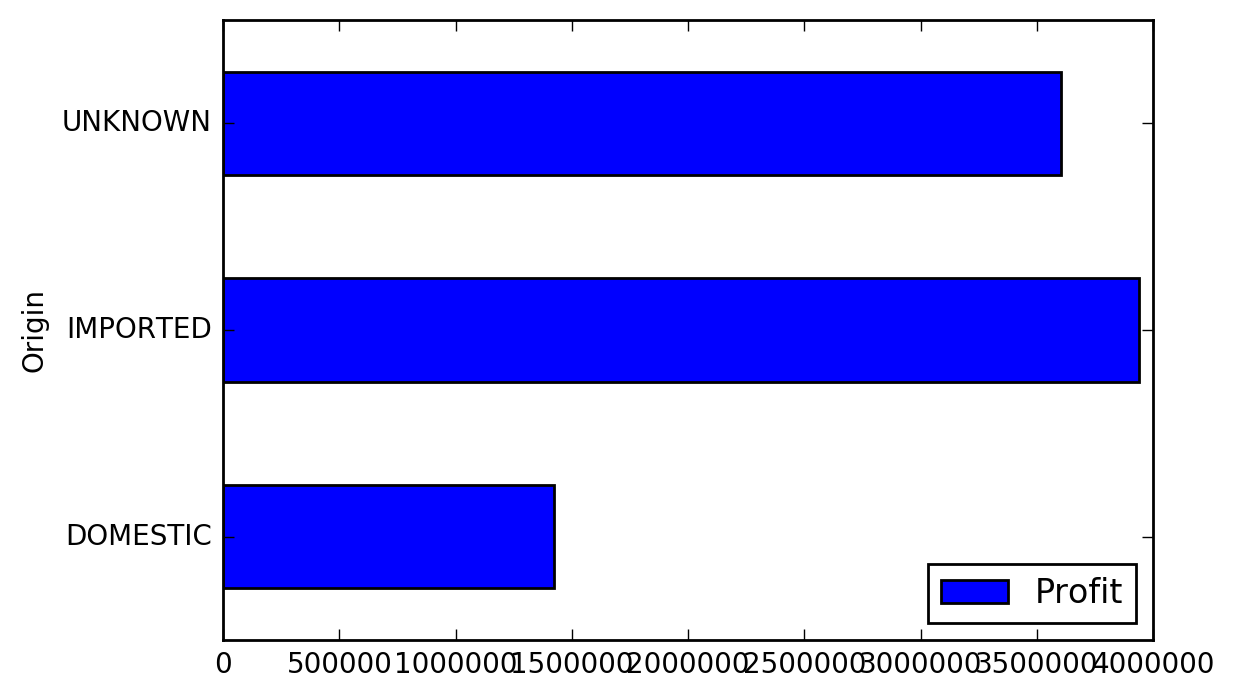

In [41]:
liquororigin = openiowa2015.groupby(['Origin'])['Profit'].sum().reset_index()
liquororigin.plot(kind ='barh', x='Origin', y='Profit');

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

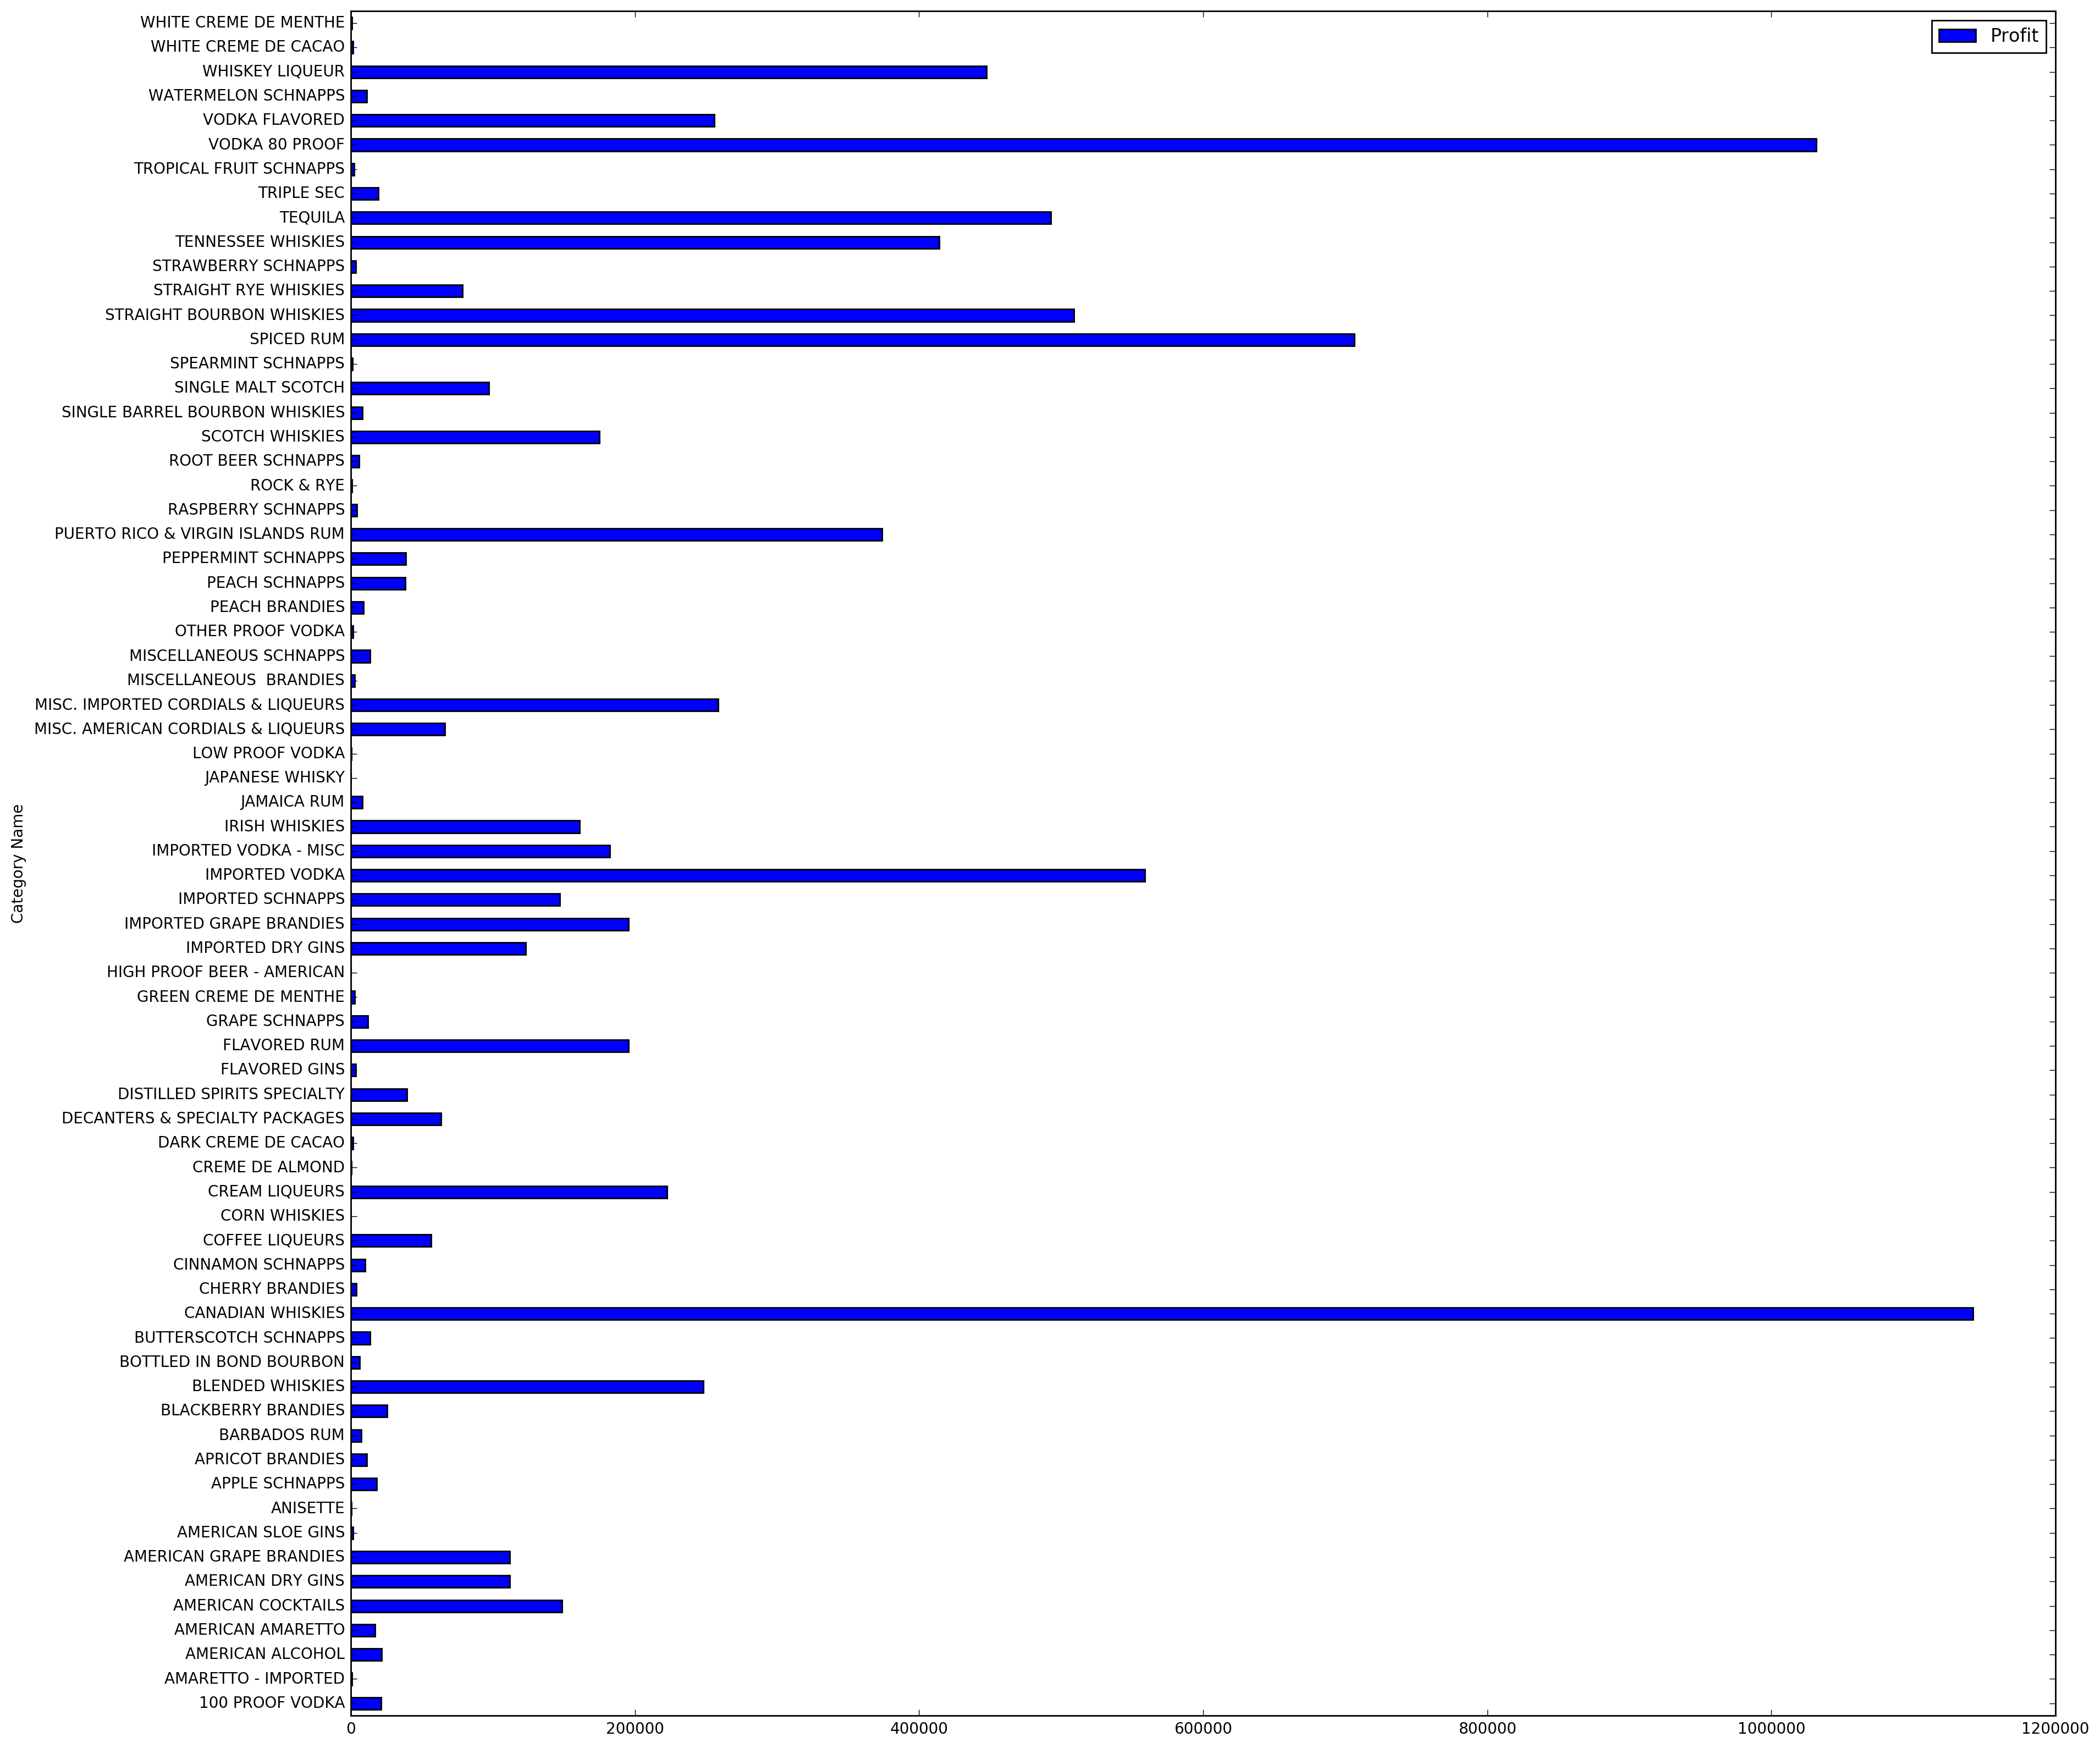

In [42]:
#liquor brand would be in Item Description, it would need to be filter out by the brands in that column
#using Category Name can give a quick guess of which brands would be more profitable
#for examplea 80 proof vodka and and Canadian whiskies has the most profit state wide
liquorbrandVprofit = openiowa2015.groupby(['Category Name'])['Profit'].sum().reset_index()
liquorbrandVprofit.plot(kind ='barh', x='Category Name', y='Profit', figsize=(20, 20));

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [43]:
#There is not a way to tax the big stores more than the Mom and Pops store. The small stores sell the 
#diffrent types of alcohol in approxmatly the same ratio as the larger store.

In [44]:
#group by iowa 2015 store number and compare volume sold (gallon) and the catgory and see if there is a diffrence
storevolume = openiowa2015.groupby(['Store Number'])['Volume Sold (Gallons)'].sum().reset_index()
storealcorigin = openiowa2015.groupby(["Store Number", "Origin"])['Volume Sold (Gallons)'].sum().reset_index()
storevolume.head()

,Store Number,Volume Sold (Gallons)
0,2106,2571.33
1,2113,174.29
2,2130,1820.65
3,2152,167.28
4,2178,506.50


In [45]:
storealcorigin.columns = ["Store Number", "Origin", "Type Volume Sold"]
storealcorigin.head()

,Store Number,Origin,Type Volume Sold
0,2106,DOMESTIC,273.88
1,2106,IMPORTED,1224.65
2,2106,UNKNOWN,1072.80
3,2113,DOMESTIC,20.08
4,2113,IMPORTED,70.47


In [46]:
#merge the storealcorigin and storevolume together. 
#Sort by Volume Sold (Gallons) compare volume sold by type and total volume sold based on how well each store does
storeoriginsold = pd.merge(storealcorigin, storevolume, on='Store Number')
storesoldamount = storeoriginsold.sort_values('Volume Sold (Gallons)', ascending=False)

In [65]:
storesoldamount.head(12)

,Store Number,Origin,Type Volume Sold,Volume Sold (Gallons)
364,2633,IMPORTED,7528.36,16356.02
365,2633,UNKNOWN,7279.16,16356.02
363,2633,DOMESTIC,1548.50,16356.02
2653,4829,DOMESTIC,1680.63,13419.53
2655,4829,UNKNOWN,5571.87,13419.53
2654,4829,IMPORTED,6167.03,13419.53
525,3385,DOMESTIC,946.28,8338.23
526,3385,IMPORTED,3354.72,8338.23
527,3385,UNKNOWN,4037.23,8338.23
100,2512,IMPORTED,2762.31,6848.37


In [66]:
storesoldamount.tail(12)

,Store Number,Origin,Type Volume Sold,Volume Sold (Gallons)
3090,5076,DOMESTIC,1.58,21.02
3092,5076,UNKNOWN,7.66,21.02
3091,5076,IMPORTED,11.78,21.02
2878,4948,UNKNOWN,8.05,20.63
2877,4948,IMPORTED,11.40,20.63
2876,4948,DOMESTIC,1.18,20.63
1767,4388,DOMESTIC,3.81,17.97
1769,4388,UNKNOWN,9.92,17.97
1768,4388,IMPORTED,4.24,17.97
2621,4811,DOMESTIC,1.19,12.72


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [49]:
iowa['Profit'] = (iowa['State Bottle Retail']-iowa['State Bottle Cost'])*iowa['Bottles Sold']
iowaQ1_2015dates =  pd.date_range('2015-01', '2015-03-31')
iowaQ1_2016dates =  pd.date_range('2016-01', '2016-03-31')
#created dataframe based on the two dates 
iowaQ1_2015 = iowa[iowa['Date'].isin(iowaQ1_2015dates)]
iowaQ1_2016 = iowa[iowa['Date'].isin(iowaQ1_2016dates)]
#use groupby zip code or city for location - county name and county number is incomplete

In [50]:
iowaQ1_2015.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Volume Sold (ml),Profit
12,2015-01-22,3858,DAVENPORT,52806,82.0,SCOTT,1012100.0,CANADIAN WHISKIES,65,15248,Windsor Canadian Pet,1750.0,8.92,13.38,1,13.38,1.75,0.46,1750.0,4.46
19,2015-03-04,2614,DAVENPORT,52807,82.0,SCOTT,1012100.0,CANADIAN WHISKIES,434,13638,Lord Calvert Canadian Whisky,1750.0,9.97,14.96,6,89.76,10.50,2.77,10500.0,29.94


In [51]:
iowaQ1_2016.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Volume Sold (ml),Profit
1,2016-03-02,2614,DAVENPORT,52807,82.0,SCOTT,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750.0,13.75,20.63,2,41.26,1.5,0.40,1500.0,13.76
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,BLACK HAWK,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000.0,12.59,18.89,24,453.36,24.0,6.34,24000.0,151.20


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [52]:
iowaQ1_2015_Profit = iowaQ1_2015.groupby('Zip Code')['Profit'].mean().reset_index()
iowaQ1_2015_Profit.head()

,Zip Code,Profit
0,50002,41.814545
1,50003,51.844000
2,50006,31.496923
3,50009,38.677805
4,50010,45.722640


In [53]:
iowaQ1_2016_Profit = iowaQ1_2016.groupby('Zip Code')['Profit'].mean().reset_index().head()
iowaQ1_2016_Profit.head()

,Zip Code,Profit
0,50002,49.640000
1,50003,48.911667
2,50006,29.252400
3,50009,49.360644
4,50010,37.823505


In [54]:
iowaQ1_2015_2016 = iowaQ1_2015_Profit.merge(iowaQ1_2016_Profit, on='Zip Code')
iowaQ1_2015_2016.columns = ['Zip Code', '2015 Profit', '2016 Profit']
iowaQ1_2015_2016.head()

,Zip Code,2015 Profit,2016 Profit
0,50002,41.814545,49.640000
1,50003,51.844000,48.911667
2,50006,31.496923,29.252400
3,50009,38.677805,49.360644
4,50010,45.722640,37.823505


In [55]:
iowaQ1_2015_2016['Growth'] = iowaQ1_2015_2016['2016 Profit']/iowaQ1_2015_2016['2015 Profit']

In [56]:
iowaQ1_2015_2016.sort_values('Growth', ascending=False).head()

,Zip Code,2015 Profit,2016 Profit,Growth
3,50009,38.677805,49.360644,1.276201
0,50002,41.814545,49.640000,1.187147
1,50003,51.844000,48.911667,0.943439
2,50006,31.496923,29.252400,0.928738
4,50010,45.722640,37.823505,0.827238


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [57]:
#I would recommend openig a store in Altoona, 50009 in Polk County 
#because it had the most growth from Q1 2015 to Q1 2016
iowa.loc[iowa['Zip Code'] == '50009'].head(1)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Volume Sold (ml),Profit
58,2015-09-16,4919,ALTOONA,50009,77.0,POLK,1031080.0,VODKA 80 PROOF,434,36308,Hawkeye Vodka,1750.0,7.17,10.76,18,193.68,31.5,8.32,31500.0,64.62


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [58]:
#The owner should sell Whiskies because Whiskies makes the most profit across all liquor types

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [59]:
#add day, month, quarter columns to iowa
#create graphs based on those three columns
#by month - from November to March alcohol sale increse each month until it falls in April
#by day - no sales are made on Sunday, Alcohol is mainly purchase Monday to Thursday, with low sales on Thursday and Friday
#by Quarter - People purchase more alcohol in the winter, rest of year is pretty similar

In [60]:
import calendar
iowa['Month'] = pd.DatetimeIndex(iowa['Date']).month
iowa['Month Name'] = iowa['Month'].apply(lambda x: calendar.month_name[x])
iowa['Day'] = pd.DatetimeIndex(iowa['Date']).weekday
iowa['Day Name'] = pd.DatetimeIndex(iowa['Date']).weekday_name
iowa['Quarter'] = pd.DatetimeIndex(iowa['Date']).quarter

In [61]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Volume Sold (ml),Profit,Month,Month Name,Day,Day Name,Quarter
0,2015-11-04,3717,SUMNER,50674,9.0,BREMER,1051100.0,APRICOT BRANDIES,55,54436,...,81.00,9.0,2.38,9000.0,27.00,11,November,2,Wednesday,4
1,2016-03-02,2614,DAVENPORT,52807,82.0,SCOTT,1011100.0,BLENDED WHISKIES,395,27605,...,41.26,1.5,0.40,1500.0,13.76,3,March,2,Wednesday,1
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,BLACK HAWK,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,453.36,24.0,6.34,24000.0,151.20,2,February,3,Thursday,1
3,2016-02-03,2501,AMES,50010,85.0,STORY,1071100.0,AMERICAN COCKTAILS,395,59154,...,85.50,10.5,2.77,10500.0,28.50,2,February,2,Wednesday,1
4,2015-08-18,3654,BELMOND,50421,99.0,WRIGHT,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,297,35918,...,129.60,21.0,5.55,21000.0,43.20,8,August,1,Tuesday,3


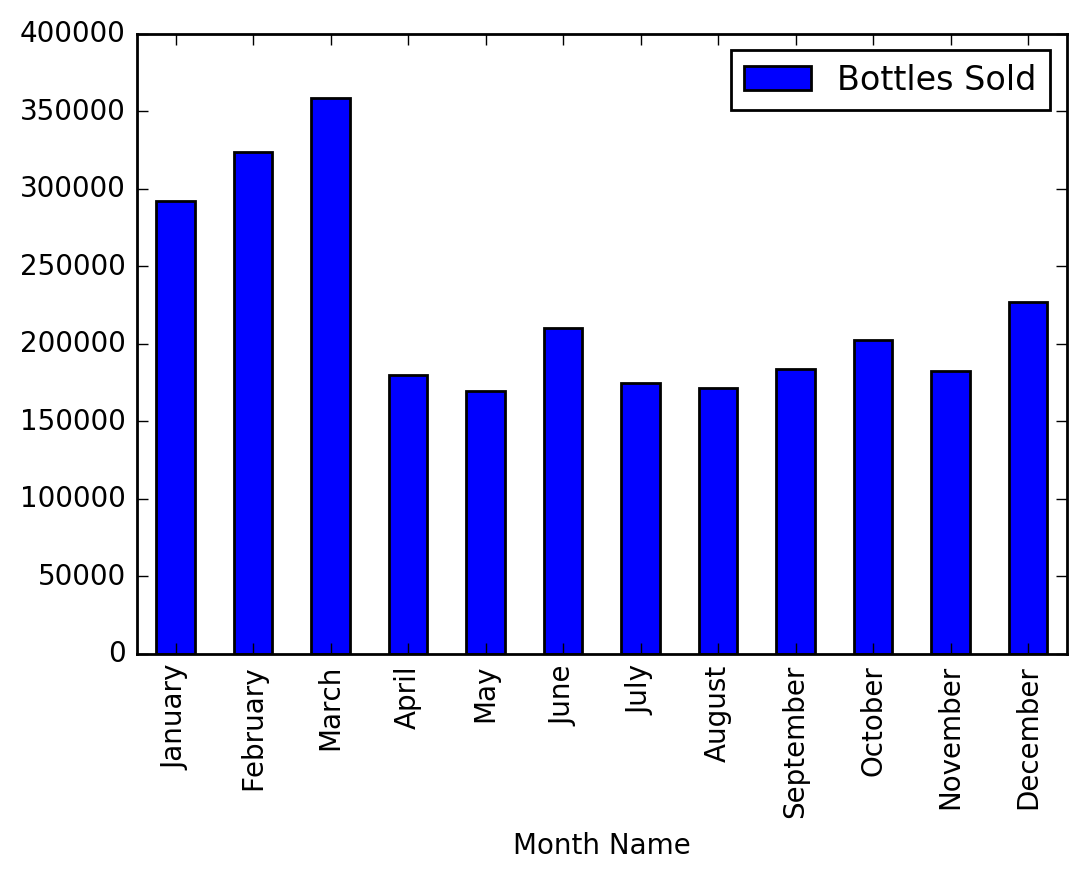

In [62]:
#by_month.plot(kind ='bar', subplots=True, x='Month');
by_month = iowa.groupby(['Month', 'Month Name'])['Bottles Sold', 'Profit'].sum().reset_index()
#by_month.plot(kind ='bar', x='Month Name', y='Profit')
by_month.plot(kind ='bar', x='Month Name', y='Bottles Sold');

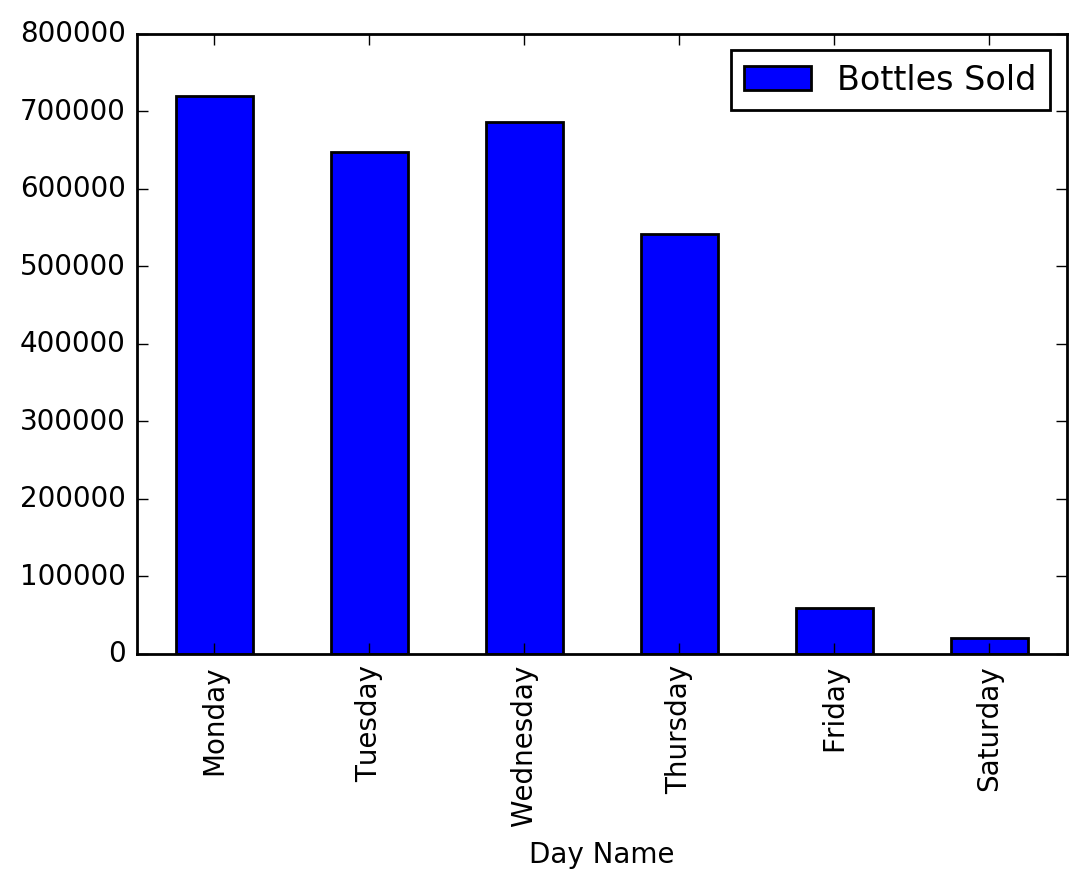

In [63]:
by_day = iowa.groupby(['Day', 'Day Name'])['Bottles Sold', 'Profit'].sum().reset_index()
#by_day.plot(kind ='bar', x='Day Name', y='Profit')
by_day.plot(kind ='bar', x='Day Name', y='Bottles Sold');

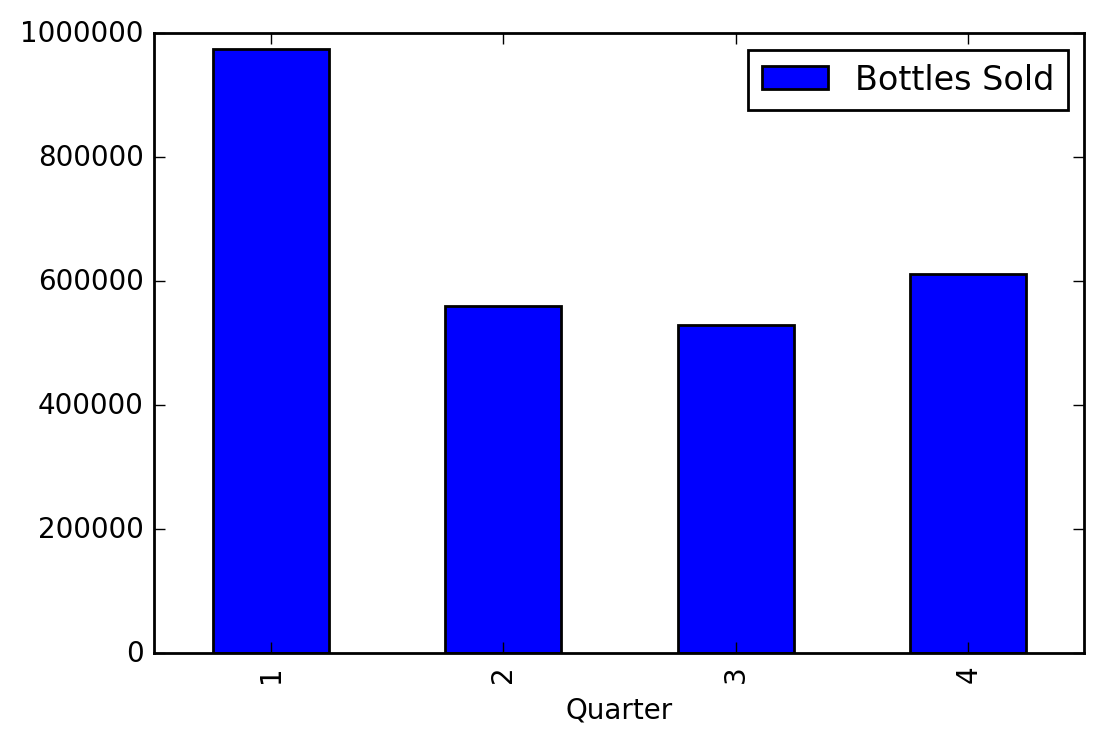

In [64]:
by_quarter = iowa.groupby('Quarter')['Bottles Sold', 'Profit'].sum().reset_index()
#by_quarter.plot(kind ='bar', x='Quarter', y='Profit')
by_quarter.plot(kind ='bar', x='Quarter', y='Bottles Sold');

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?